In [7]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [8]:
class TEST():
    def __init__(self,stock=0.5,bond=0.5,rebalance=0.55):
        self.net_value=1
        self.rebalance_record={} #调仓记录
        self.rebalance_ratio={'stock':stock,'bond':bond}
        self.threshold=rebalance
        self.stock_ratio=stock
        self.bond_ratio=bond
        self.balance={}
        
    def check(self):
        return self.stock_ratio>=self.threshold or self.bond_ratio>=self.threshold
    
    def rebalance(self):
        self.stock_ratio=self.rebalance_ratio['stock']
        self.bond_ratio=self.rebalance_ratio['bond']
        
    def calculate(self,data):
        self.stock_net=self.net_value * self.stock_ratio *(1+data['stock']/100)
        self.bond_net=self.net_value * self.bond_ratio *(1+data['bond']/100)
        self.net_value=self.stock_net+self.bond_net
        self.stock_ratio=self.stock_net/self.net_value
        self.bond_ratio=self.bond_net/self.net_value
        self.balance[data.date]=self.net_value
    
    def trade(self,data):
        self.calculate(data)
        if self.check():
            self.rebalance_record[data.date]={'stock':self.stock_ratio,'bond':self.bond_ratio}
            self.rebalance()
        else:
            pass
        return pd.Series({'stock_ratio':self.stock_ratio,'bond_ratio':self.bond_ratio,\
                          'stock_net':self.stock_net,'bond_net':self.bond_net})
                

In [9]:
realdata=pd.read_excel('tickdata.xlsx',sheetname='Sheet1')
a=TEST()
total=realdata.apply(a.trade,axis=1,result_type='expand')
total.index=realdata.date
total.head()

,stock_ratio,bond_ratio,stock_net,bond_net
date,,,,
2013-03-26,0.498401,0.501599,0.498017,0.501212
2013-03-27,0.498746,0.501254,0.498584,0.501091
2013-03-28,0.491349,0.508651,0.484561,0.501624
2013-03-29,0.491239,0.508761,0.484845,0.502138
2013-04-01,0.493068,0.506932,0.488952,0.502701


In [10]:
rebalance_record = pd.DataFrame(a.rebalance_record).T
rebalance_record.head()

,bond,stock
2014-08-11,0.448353,0.551647
2014-12-15,0.449299,0.550701
2015-03-23,0.449570,0.550430
2015-05-13,0.448173,0.551827
2015-06-02,0.444598,0.555402


In [11]:
net_value = pd.Series(a.balance, name='strategy')
net_value.head()

2013-03-26    0.999229
2013-03-27    0.999675
2013-03-28    0.986185
2013-03-29    0.986982
2013-04-01    0.991653
Name: strategy, dtype: float64

In [12]:
hs300=pd.read_excel('tickdata.xlsx',sheetname='Sheet2')
hs300['cum']=(hs300['hs300']/100+1).cumprod()
hs300.drop(columns='hs300',inplace=True)
hs300.set_index('date',inplace=True)
hs300.head()

,cum
date,
2013-03-26,0.985440
2013-03-27,0.988685
2013-03-28,0.956452
2013-03-29,0.954837
2013-04-01,0.954112


In [13]:
result=pd.concat([net_value,hs300],axis=1)
result.rename(columns={'cum':"hs300"},inplace=True)
result.head()

,strategy,hs300
2013-03-26,0.999229,0.985440
2013-03-27,0.999675,0.988685
2013-03-28,0.986185,0.956452
2013-03-29,0.986982,0.954837
2013-04-01,0.991653,0.954112


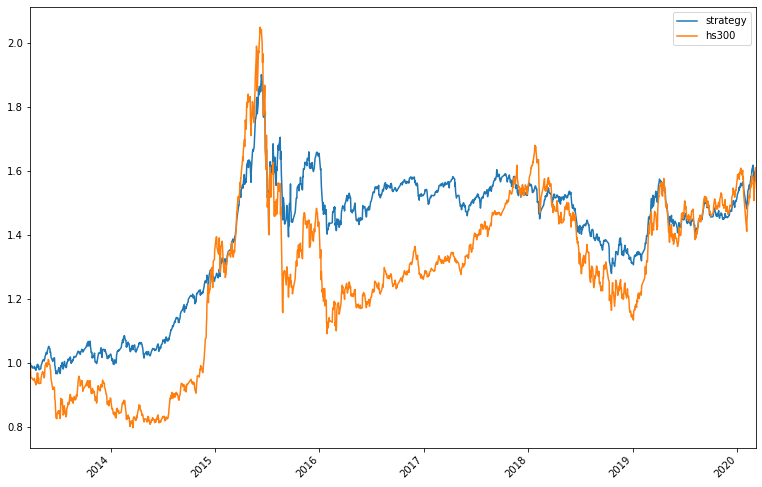

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
result.plot(figsize=(13,9))
plt.xticks(rotation=45) 
plt.show()